In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
mydata = pd.read_csv("../data/test_2.0.csv")
test = pd.read_csv("../data/test.csv")

In [32]:
missingValues = mydata.isna().any()
#missingValues.loc[missingValues[1] == True]

#missing data
total = mydata.isnull().sum().sort_values(ascending=False)
percent = (mydata.isnull().sum()/mydata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF2,1,0.000685


In [55]:
data["PoolQC"] = data['PoolQC'].isnull().astype(int)



In [48]:
processed_data = data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
#processed_data = processed_data.drop(processed_data.loc[processed_data['Electrical'].isnull()].index)
processed_data.isnull().sum().max()
mydata = processed_data

In [42]:
data.loc("PoolQC" == "Ex")

ValueError: No axis named False for object type <class 'type'>

In [43]:
#box plot PoolQC/saleprice
var = 'PoolQC'
dataBis = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=dataBis)
fig.axis(ymin=0, ymax=800000);

KeyError: 'SalePrice'

In [44]:
#box plot PoolQC/saleprice
var = 'Fence'
dataBis = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=dataBis)
fig.axis(ymin=0, ymax=800000);

KeyError: 'SalePrice'

In [49]:
mydata.drop(mydata[(mydata['OverallQual']<5) & (mydata['SalePrice']>200000)].index, inplace=True)
mydata.drop(mydata[(mydata['GrLivArea']>4000) & (mydata['SalePrice']<300000)].index, inplace=True)
mydata.reset_index(drop=True, inplace=True)

# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
mydata['MSSubClass'] = mydata['MSSubClass'].apply(str)
mydata['YrSold'] = mydata['YrSold'].astype(str)
mydata['MoSold'] = mydata['MoSold'].astype(str)

mydata;

KeyError: 'SalePrice'

In [50]:
mydata.drop("Id", 1);

In [16]:
mydata["SalePrice"] = np.log1p(data["SalePrice"])

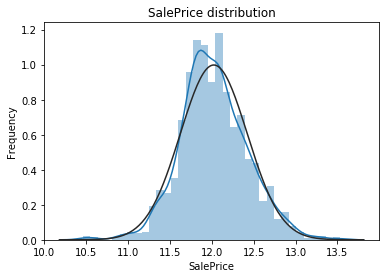

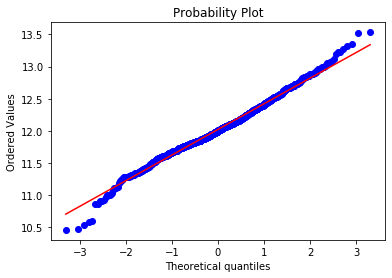

In [22]:
sns.distplot(mydata['SalePrice'] , fit=norm);

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(mydata['SalePrice'], plot=plt)
plt.show()

In [51]:
data_numeric = mydata[mydata.dtypes[mydata.dtypes != "object"].index];

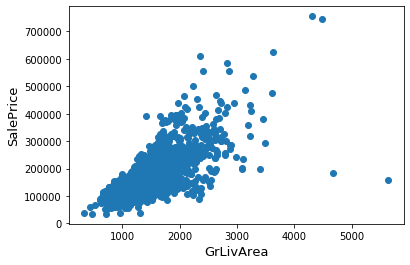

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

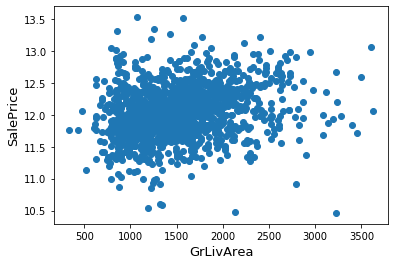

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = data_numeric['GrLivArea'], y = data_numeric['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [52]:
export_csv = data_numeric.to_csv (r'../data/test_1.0.csv', index = None, header=True)


In [29]:
sub = pd.DataFrame()
sub['Id'] = test["Id"]
sub['SalePrice'] = test["Id"]
sub.to_csv('../submissions/submission_1.0.csv',index=False)

In [65]:
mydata = pd.read_csv("../data/test.csv")

missingValues = mydata.isna().any()
#missingValues.loc[missingValues[1] == True]

#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


mydata = data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
#processed_data = processed_data.drop(processed_data.loc[processed_data['Electrical'].isnull()].index)
mydata.isnull().sum().max()

mydata.drop(mydata[(mydata['OverallQual']<5) & (mydata['SalePrice']>200000)].index, inplace=True)
mydata.drop(mydata[(mydata['GrLivArea']>4000) & (mydata['SalePrice']<300000)].index, inplace=True)
mydata.reset_index(drop=True, inplace=True)

# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
mydata['MSSubClass'] = mydata['MSSubClass'].apply(str)
mydata['YrSold'] = mydata['YrSold'].astype(str)
mydata['MoSold'] = mydata['MoSold'].astype(str)

mydata = mydata.drop("Id", 1)

data_numeric = mydata[mydata.dtypes[mydata.dtypes != "object"].index];

data_numeric

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450,7,5,2003,2003,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,11250,7,5,2001,2002,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,9550,7,5,1915,1970,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000
5,14115,5,5,1993,1995,732,0,64,796,796,...,2,480,40,30,0,320,0,0,700,143000
6,10084,8,5,2004,2005,1369,0,317,1686,1694,...,2,636,255,57,0,0,0,0,0,307000
7,10382,7,6,1973,1973,859,32,216,1107,1107,...,2,484,235,204,228,0,0,0,350,200000
8,6120,7,5,1931,1950,0,0,952,952,1022,...,2,468,90,0,205,0,0,0,0,129900
9,7420,5,6,1939,1950,851,0,140,991,1077,...,1,205,0,4,0,0,0,0,0,118000


In [65]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [66]:
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [67]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = np.log1p(train.SalePrice.values)
all_data = pd.concat((train, test)).reset_index(drop=True)

all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Id'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2916, 79)


In [68]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [69]:
def fill_missings(res):

    res['Alley'] = res['Alley'].fillna('missing')
    res['PoolQC'] = res['PoolQC'].fillna(res['PoolQC'].mode()[0])
    res['MasVnrType'] = res['MasVnrType'].fillna('None')
    res['BsmtQual'] = res['BsmtQual'].fillna(res['BsmtQual'].mode()[0])
    res['BsmtCond'] = res['BsmtCond'].fillna(res['BsmtCond'].mode()[0])
    res['FireplaceQu'] = res['FireplaceQu'].fillna(res['FireplaceQu'].mode()[0])
    res['GarageType'] = res['GarageType'].fillna('missing')
    res['GarageFinish'] = res['GarageFinish'].fillna(res['GarageFinish'].mode()[0])
    res['GarageQual'] = res['GarageQual'].fillna(res['GarageQual'].mode()[0])
    res['GarageCond'] = res['GarageCond'].fillna('missing')
    res['Fence'] = res['Fence'].fillna('missing')
    res['Street'] = res['Street'].fillna('missing')
    res['LotShape'] = res['LotShape'].fillna('missing')
    res['LandContour'] = res['LandContour'].fillna('missing')
    res['BsmtExposure'] = res['BsmtExposure'].fillna(res['BsmtExposure'].mode()[0])
    res['BsmtFinType1'] = res['BsmtFinType1'].fillna('missing')
    res['BsmtFinType2'] = res['BsmtFinType2'].fillna('missing')
    res['CentralAir'] = res['CentralAir'].fillna('missing')
    res['Electrical'] = res['Electrical'].fillna(res['Electrical'].mode()[0])
    res['MiscFeature'] = res['MiscFeature'].fillna('missing')
    res['MSZoning'] = res['MSZoning'].fillna(res['MSZoning'].mode()[0])    
    res['Utilities'] = res['Utilities'].fillna('missing')
    res['Exterior1st'] = res['Exterior1st'].fillna(res['Exterior1st'].mode()[0])
    res['Exterior2nd'] = res['Exterior2nd'].fillna(res['Exterior2nd'].mode()[0])    
    res['KitchenQual'] = res['KitchenQual'].fillna(res['KitchenQual'].mode()[0])
    res["Functional"] = res["Functional"].fillna("Typ")
    res['SaleType'] = res['SaleType'].fillna(res['SaleType'].mode()[0])
    res['SaleCondition'] = res['SaleCondition'].fillna('missing')
    
    flist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                     'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                     'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                     'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
    for fl in flist:
        res[fl] = res[fl].fillna(0)
        
    res['TotalBsmtSF'] = res['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['2ndFlrSF'] = res['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    res['GarageArea'] = res['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['GarageCars'] = res['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
    res['LotFrontage'] = res['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
    res['MasVnrArea'] = res['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
    res['BsmtFinSF1'] = res['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    
      
    return res

In [70]:
all_data = fill_missings(all_data)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [71]:
missingValues = all_data.isna().any()
total = all_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

all_data = all_data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
all_data.isnull().sum().max()

0

In [72]:
def QualToInt(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

all_data['ExterQual'] = all_data['ExterQual'].apply(QualToInt)
all_data['ExterCond'] = all_data['ExterCond'].apply(QualToInt)
all_data['KitchenQual'] = all_data['KitchenQual'].apply(QualToInt)
all_data['HeatingQC'] = all_data['HeatingQC'].apply(QualToInt)
all_data['BsmtQual'] = all_data['BsmtQual'].apply(QualToInt)
all_data['BsmtCond'] = all_data['BsmtCond'].apply(QualToInt)
all_data['FireplaceQu'] = all_data['FireplaceQu'].apply(QualToInt)
all_data['GarageQual'] = all_data['GarageQual'].apply(QualToInt)
all_data['PoolQC'] = all_data['PoolQC'].apply(QualToInt)

def SlopeToInt(x):
    if(x=='Gtl'):
        r = 0
    elif(x=='Mod'):
        r = 1
    elif(x=='Sev'):
        r = 2
    else:
        r = 3
    return r

all_data['LandSlope'] = all_data['LandSlope'].apply(SlopeToInt)
all_data['CentralAir'] = all_data['CentralAir'].apply( lambda x: 0 if x == 'N' else 1) 
all_data['Street'] = all_data['Street'].apply( lambda x: 0 if x == 'Pave' else 1) 
all_data['PavedDrive'] = all_data['PavedDrive'].apply( lambda x: 0 if x == 'Y' else 1)

def GFinishToInt(x):
    if(x=='Fin'):
        r = 0
    elif(x=='RFn'):
        r = 1
    elif(x=='Unf'):
        r = 2
    else:
        r = 3
    return r

all_data['GarageFinish'] = all_data['GarageFinish'].apply(GFinishToInt)

def BsmtExposureToInt(x):
    if(x=='Gd'):
        r = 0
    elif(x=='Av'):
        r = 1
    elif(x=='Mn'):
        r = 2
    elif(x=='No'):
        r = 3
    else:
        r = 4
    return r
all_data['BsmtExposure'] = all_data['BsmtExposure'].apply(BsmtExposureToInt)

def FunctionalToInt(x):
    if(x=='Typ'):
        r = 0
    elif(x=='Min1'):
        r = 1
    elif(x=='Min2'):
        r = 1
    else:
        r = 2
    return r

all_data['Functional_int'] = all_data['Functional'].apply(FunctionalToInt)


def HouseStyleToInt(x):
    if(x=='1.5Unf'):
        r = 0
    elif(x=='SFoyer'):
        r = 1
    elif(x=='1.5Fin'):
        r = 2
    elif(x=='2.5Unf'):
        r = 3
    elif(x=='SLvl'):
        r = 4
    elif(x=='1Story'):
        r = 5
    elif(x=='2Story'):
        r = 6  
    elif(x==' 2.5Fin'):
        r = 7          
    else:
        r = 8
    return r

all_data['HouseStyle_int'] = all_data['HouseStyle'].apply(HouseStyleToInt)
all_data['HouseStyle_1st'] = 1*(all_data['HouseStyle'] == '1Story')
all_data['HouseStyle_2st'] = 1*(all_data['HouseStyle'] == '2Story')
all_data['HouseStyle_15st'] = 1*(all_data['HouseStyle'] == '1.5Fin')

def FoundationToInt(x):
    if(x=='PConc'):
        r = 3
    elif(x=='CBlock'):
        r = 2
    elif(x=='BrkTil'):
        r = 1        
    else:
        r = 0
    return r

all_data['Foundation_int'] = all_data['Foundation'].apply(FoundationToInt)

def MasVnrTypeToInt(x):
    if(x=='Stone'):
        r = 3
    elif(x=='BrkFace'):
        r = 2
    elif(x=='BrkCmn'):
        r = 1        
    else:
        r = 0
    return r

all_data['MasVnrType_int'] = all_data['MasVnrType'].apply(MasVnrTypeToInt)

def BsmtFinType1ToInt(x):
    if(x=='GLQ'):
        r = 6
    elif(x=='ALQ'):
        r = 5
    elif(x=='BLQ'):
        r = 4
    elif(x=='Rec'):
        r = 3   
    elif(x=='LwQ'):
        r = 2
    elif(x=='Unf'):
        r = 1        
    else:
        r = 0
    return r

all_data['BsmtFinType1_int'] = all_data['BsmtFinType1'].apply(BsmtFinType1ToInt)
all_data['BsmtFinType1_Unf'] = 1*(all_data['BsmtFinType1'] == 'Unf')
all_data['HasWoodDeck'] = (all_data['WoodDeckSF'] == 0) * 1
all_data['HasOpenPorch'] = (all_data['OpenPorchSF'] == 0) * 1
all_data['HasEnclosedPorch'] = (all_data['EnclosedPorch'] == 0) * 1
all_data['Has3SsnPorch'] = (all_data['3SsnPorch'] == 0) * 1
all_data['HasScreenPorch'] = (all_data['ScreenPorch'] == 0) * 1
all_data['YearsSinceRemodel'] = all_data['YrSold'].astype(int) - all_data['YearRemodAdd'].astype(int)
all_data['Total_Home_Quality'] = all_data['OverallQual'] + all_data['OverallCond']

In [73]:
def addlogs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

all_data = addlogs(all_data, loglist)

In [74]:
all_dummies = pd.get_dummies(all_data)

In [75]:
def addSquared(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

sqpredlist = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log',
              'OverallQual','ExterQual','BsmtQual','GarageQual','FireplaceQu','KitchenQual']
df = addSquared(df, sqpredlist)

NameError: name 'df' is not defined

In [76]:
train_data  = all_dummies[:ntrain]
train_data["SalePrice"] = y_train
test_data = all_dummies[ntrain:]
print(train_data.shape)
test_data.shape

(1457, 331)


(1459, 330)

In [64]:
train_data.to_csv (r'../data/train_3.0.csv', index = None, header=True)
test_data.to_csv (r'../data/test_3.0.csv', index = None, header=True)